<center>

## <span style="font-size: 35px; font-weight: bold;">MODELAMIENTO DE LAS CANCELACIONES DE CONTRATOS DE LA EMPRESA INTERCONNECT</span>
    
    

</center>

<a href="https://drive.google.com/uc?export=view&id=1-d4ljxOiKBLZuSD8Y28rXbPulRKqWevp">
  <img src="https://drive.google.com/uc?export=view&id=1-d4ljxOiKBLZuSD8Y28rXbPulRKqWevp" style="max-width: 100%; max-height: 100%" align="center" title="Fibre Optic" /></a>
  

# Tabla de contenidos



* [INFORME DE SOLUCIÓN](#solution_report)
    * [1.RESUMEN EJECUTIVO](#summary)
    * [2.INTRODUCCIÓN](#introduction)
    * [3.OBJETIVOS](#objectives)
    * [4.METODOLOGÍA](#methodology)
    * [5.CONTEXTO](#context)
    * [6.DESARROLLO DE LOS MODELOS](#development)
    * [7.RESULTADOS Y DISCUSIÓN](#results)
    * [8.CONCLUSIONES](#conclusions)
    * [9.RECOMENDACIONES](#recomendations)
    * [10.REFERENCIAS](#references)
    * [11.ANEXOS](#annexes)
* [A) EDA y PLAN DE TRABAJO](#plan_&_eda)
    * [A.1 Pre-Procesamiento de Datos](#data_pre-processing)
    * [A.2 Conclusiones Intermedias Pre-Procesamiento de Datos](#conclusions_pre-processing)
    * [A.3 Análsis Exploratorio de Datos](#eda)
    * [A.4 Conclusiones Análisis Exploratorio de Datos](#conclusions_eda)
    * [A.5 Plan de Trabajo](#work_plan)
* [B) CÓDIGO DE SOLUCIÓN](#solution_code)
    * [B.1 Preparación de datos para el modelamiento](#feature_engineering)
    * [B.2 División de datos](#train_test_split)
    * [B.3 Estandarización de datos](#standarization)
    * [B.4 Selección de modelos](#modelling)
    * [B.5 Entrenamiento y evaluación de modelos](#evaluation)
    * [B.6 Conclusiones intermedias evaluación de modelos](#conclusions_evaluation)
    * [B.7 Validación de modelos](#validation)
    * [B.8 Conclusiones intermedias validación de modelos](#conclusions_validation)

# INFORME DE SOLUCIÓN <a name="solution_report"></a>

# 1. RESUMEN EJECUTIVO <a name="summary"></a>

El presente trabajo de modelación abordó el problema de la cancelación de contratos por parte de los clientes de la empresa Interconnect. De acuerdo con el análisis exploratorio de datos (EDA), la tasa de cancelación de contratos de la empresa fue del 27 % durante el período 2013-2020. En ese sentido, el objetivo principal del proyecto fue el de construir un modelo que logre predecir las cancelaciones de contratos (con un AUC-ROC mínimo de 0.75) para que la empresa diseñe e implemente estrategias comerciales de retención de sus clientes. El problema de la predicción de cancelaciones es de clasificación. Por lo tanto, se entrenaron seis modelos de clasificación de los cuales cuatro fueron validados. El modelo ganador fue el de Árbol de Decisión con un AUC-ROC de 0.89 y una exactitud de 0.86. Cabe señalar que no se aplicaron técnicas formales de reducción de dismensionalidad, ni tampoco se consideró a las redes neuronales densas en la evaluación de modelos. No obstante, los resultados con la metodología aplicada superaron los objetivos de la tarea.   

# 2. INTRODUCCIÓN <a name="introduction"></a>

La presente modelación abordó el problema de la cancelación de contratos por parte de los clientes de la empresa Interconnect. 

De acuerdo con el análisis exploratorio de datos (EDA) (ver Anexo B), la tasa de cancelación de contratos fue del 27 % durante el período 2013-2020. Cabe resaltar que las cancelaciones se suscitaron en los dos últimos años de este período. Por otra parte, aunque la tasa de cancelaciones decreció del 20 % en 2019 al 7 % en 2020, este continúa siendo un problema serio para la empresa. 

Adicionalmente, de acuerdo al EDA, entre las variables que más influyen en las cancelaciones se pueden destacar la duración de los contratos, la forma de pago, y la situación personal de los clientes. Con respecto a este último  punto, los adultos mayores, las personas sin pareja, y aquellas que no tienen hijos tiende a cancelar más sus contratos (ver Anexo B).  

Considerando este contexto, la empresa requiere predecir las cancelaciones para diseñar e implementar estrategias comerciales de retención de sus clientes.  En ese sentido, el presente informe reporta sobre la solución de modelación propuesta para este fin. 

# 3. OBJETIVOS <a name="objectives"></a>

Los objetivos del presente proyecto son:

* Entender la dinámica del negocio y de las cancelaciones de contratos de Interconnect mediante un análisis exploratorio de datos.

* Construir un modelo que logre predecir las cancelaciones de contratos. La métrica de evaluación  y criterio mínimo de aceptación del modelo es que el mismo alcance un AUC-ROC mayor o igual a 0.75.

# 4. CONTEXTO <a name="context"></a>


### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

# 5. METODOLOGÍA <a name="methodology"></a>

Se procedió a ejecutar la secuencia común del desarrollo de modelos de aprendizaje automático (descrita en el plan de trabajo), la misma que contempla los siguientes pasos: 1) comprensión del problema y objetivos, 2) recopilación de datos, 3) pre-procesamiento de datos, 4) análisis exploratorio de datos, 5) preparación de datos para el modelamiento (selección de características y codificación de variables categóricas), 6) división de datos (entrenamiento, prueba y validación), 7) estandarización, 8) selección y entrenamiento de modelos, 9) evaluación de modelos, y 10) validación de modelos.  En ese sentido, se realizaron todos los pasos del plan (Ver Anexo A).

El problema de la predicción de cancelaciones es un problema de clasificación. En ese sentido, se entrenaron los siguientes modelos: 1) Regresión Logística, 2) Árbol de Decisión, 3) K-Vecinos Cercanos, 4) Bosque Aleatorio, 5) Support Vector Machine, y 6) Potenciación de Gradiente. 

Los datos utilizados correspondieron a información del contrato, datos personales de los clientes, información sobre los servicios de internet y telefónicos. Los datos de los contratos fueron los que más pre-proesamiento requirieron, incluyendo el relleno de 12 datos ausentes relaciones a los pagos totales. Se asumió que el corte de la información se realizó en el último mes, y que por esa razón, los valores ausentes corresponden a valores no pagados (0 $). 

# 6. DESARROLLO DE LOS MODELOS <a name="development"></a>

Los seis modelos se entrenaron con los datos limpios y preparados (codificados y escalados). En virtud de que el  EDA detectó un desbalance de clases de la variable objetivo (27% de contrato cancelados versus 73 % vigentes), se aplicó el parámetro “class_weight='balanced'” en los modelos que permiten la aplicación directa del mismo en la inicialización (Regresión Logística, Árbol de Decisión, Bosque Aleatorio, Support Vector Machine). En el caso de los modelos  K-Vecinos Cercanos y  Potenciación de Gradiente, se desarrolló un función para el sobremuestreo de datos.

Los hiper-parámetros de los modelos que fueron validados se presentan en la siguiente tabla:

|       **Modelo**       |                   **Hiper-parámetros**                   |
|:----------------------:|:--------------------------------------------------------:|
|   Regresión Logística  |                         No aplica                        |
|    Árbol de Decisión   |  Máxima Profundidad del Árbol: 9<br>Estado Aleatorio: 42 |
|    Bosque Aleatorio    | Máxima Profundidad del Árbol: 10<br>Estado Aleatorio: 42 |
| Support Vector Machine |      Probabilidad: Verdadero<br>Estado Aleatorio: 42     |

# 7. RESULTADOS Y DISCUSIÓN <a name="results"></a>

Los resultados de los modelos validados superan los objetivos establecidos inicialmente. Incluso, dos modelos (Bosque Aleatorio y Árbol de Decisión) alcanzan el puntaje máximo de la tarea de 6 SP, conviertiéndolos en modelos altamente confiables. 

Aunque los resultados son buenos, existen dos áreas de mejora. En primer lugar, se pudo haber aplicado alguna técnica formal de reducción de dimensionalidad (ej.: análisis de componentes principales) para validar la selección de características. Por otra parte, no se exploró el modelo de red neuronal densa debido a que modelos más simples cumplieron los objetivos. No obstante, sería interesante explorar si los resultados mejoran con un algoritmo más complejo. 


Los resultados de los modelos validados se presentan en la siguiente tabla:

| **Ranking** |       **Modelo**       | **AUC-ROC** | **Accuracy** | **Criterios de Evaluación** | **Puntaje de la Tarea (SP)** |
|:-----------:|:----------------------:|:-----------:|:------------:|:---------------------------:|:----------------------------:|
|      1      |    Bosque Aleatorio    |     0.89    |     0.86     |        AUC-ROC ≥ 0.88       |               6              |
|      2      |    Árbol de Decisión   |     0.88    |     0.84     |        AUC-ROC ≥ 0.88       |               6              |
|      3      | Support Vector Machine |     0.84    |     0.80     |    0.81 ≤ AUC-ROC < 0.85    |              4.5             |
|      4      |   Regresión Logística  |     0.77    |     0.75     |    0.75 ≤ AUC-ROC < 0.81    |               4              |

# 8. CONCLUSIONES  <a name="conclusions"></a>

1. La tasa de cancelaciones decreció del 20% en 2019 al 7% en 2020.

2. El 45% de las cancelaciones están asociadas al método de pago de cheque electrónico ("Electronic Check"). La comparación se realizó con datos de la misma clase, y es notablemente mayor al analizar las comparaciones del resto de clases.

3. El análisis de correlación (de variables binarias) determina que la variable que más se relaciona con la terminación de los contratos es la duración de los mismos (coeficiente de correlación de -0.37). Es decir, mientras más duran los contratos, existen menos cancelaciones.

4. El género es la única variable que no incide en la cancelación de contratos. Por otra parte, los adultos mayores, las personas sin pareja, y aquellas que no tienen hijos cancelan más sus contatos.

5. La validación de modelos determinó que, que cuatro modelos cumplen con los objetivos de la tarea. El ranking de los mismos en esta etapa fue el siguiente: 1) Bosque Aleatorio (AUC-ROC=0.89), Árbol de Decision (AUC-ROC=0.88), Support Vector Machine (AUC-ROC=0.84), y Logistic Regression (AUC-ROC=0.77).

# 9. RECOMENDACIONES <a name="recomendations"></a>

1. Aplicar una técnica formal de reducción de dimensionalidad (ej.: análisis de componentes principales) para validar la selección de características.

2. No se exploró el modelo de red neuronal densa debido a que modelos más simples cumplieron los objetivos. No obstante, sería interesante explorar si los resultados mejoran con un algoritmo más complejo. 

# 10. REFERENCIAS <a name="references"></a>

1. HALE, Jeff (2919). Scale, Standardize, or Normalize with Scikit-Learn. fuente: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

# 11. ANEXOS <a name="annexes"></a>

A. EDA y Plan de trabajo. <br/>
B. Código de solución

# A) EDA Y PLAN DE TRABAJO <a name="plan_&_eda"></a>

## Inicialización <a name="initialization"></a>

In [1]:
# Importa librerías
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga los datos

contract = pd.read_csv("/datasets/final_provider/contract.csv")
internet = pd.read_csv("/datasets/final_provider/internet.csv")
personal = pd.read_csv("/datasets/final_provider/personal.csv")
phone = pd.read_csv("/datasets/final_provider/phone.csv")

In [3]:
# Carga los datos

#contract = pd.read_csv("contract.csv")
#internet = pd.read_csv("internet.csv")
#personal = pd.read_csv("personal.csv")
#phone = pd.read_csv("phone.csv")

## A.1 Pre-Procesamiento de Datos <a name="data_pre-processing"></a>

### Especificaciones del contrato

In [4]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


La mayor parte de los títulos de las columnas están escritas con estilo "Pascal Case", con excepción de la primera que tiene estilo "Camel Case". Se transformará este título a "Pascal Case" para uniformar los estilos.    

In [5]:
contract.rename(columns = {'customerID':'CustomerID'}, inplace = True)
contract.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [6]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


La síntesis de información revela que existe un par de inconsistencias en los tipos de datos. Las mismas se detallan a continuación: 

1. Las columnas de fechas tienen tipo de dato de objeto en lugar de datetime.
2. La columna "Total Charges"tiene tipo de dato de objeto en lugar de float64.

En ese sentido, se realizarán las transformaciones correspondientes.

In [7]:
contract['BeginDate']= pd.to_datetime(contract['BeginDate'])
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 440.3+ KB


In [8]:
contract.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65


Algunos contratos tienen fecha de finalización y otros, al parecer, continúan vigentes y se encuentran catalogados en esta columan como "No". En ese sentido, para la transformación de la columna "EndDate" se aplicó el parámetro errors='coerce' que asegura que cualquier valor que no pueda ser convertidos a un formato válido de fecha sea reemplazado con "NaT" ("Not a Time"). En ese sentido, los contratos sin fecha de finalización ahora se encuentran catalogados como "NaT".

In [9]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract.dtypes

CustomerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
dtype: object

Algunos datos de la columna "TotalCharges" tienen espacios en blanco. En ese sentido , para poder realizar la conversión del tipo de dato objeto a flot se utilizó el parámetro errors='coerce' que asegura que cualquier valor que no pueda ser convertido a tipo de dato numérico sea reemplazo con "Nan" (valor ausente). 

In [10]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


La síntesis de información refleja que ahora tenemos datos ausentes en dos columnas: "EndDate" y "TotalCharges". 

Con respecto a "EndDate", como se mencionó anteriormente, los valores catalogados como "No" fueron reemplazados por "Nat" ("Not a Number") para poder operar la transformación del tipo de datos. Se asumió que estos valores "No" corresponden a contratos que siguen vigentes. Por lo tanto, no tendría sentido que sean rellenados. No obstante, en virtud de que la vigencia de los contratos como "No/NaT" es una suposición (la catalogación de "No" no es muy clara") esta será una pregunta para el líder del proyecto. Una vez que se obtenga la respuesta, se revisará la decisión de no rellenar los datos.

Por otra parte, con respecto a "TotalCharges", se explorará este campo en detalle para decidir sobre la mejor forma de rellenar sus datos ausentes.

In [11]:
contract[contract['TotalCharges'].isna()]

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN


In [12]:
contract.groupby('Type').describe()

MonthlyCharges                                              \
                        count       mean        std    min     25%    50%   
Type                                                                        
Month-to-month         3875.0  66.398490  26.926599  18.75  45.850  73.25   
One year               1473.0  65.048608  31.840539  18.25  26.900  68.75   
Two year               1695.0  60.770413  34.678865  18.40  24.025  64.35   

                               TotalCharges                                   \
                   75%     max        count         mean          std    min   
Type                                                                           
Month-to-month  88.875  117.45       3875.0  1369.254581  1613.879008  18.85   
One year        94.800  118.60       1472.0  3034.683084  2229.730075  18.80   
Two year        90.450  118.75       1685.0  3728.933947  2571.252806  20.35   

                                                     
                    25%      50%       75%      max  
Type                                                 
Month-to-month   160.10   679.55  2066.500  8061.50  
One year         989.35  2657.55  4859.525  8684.80  
Two year        1278.80  3623.95  5999.850  8672.45

In [13]:
contract.query('BeginDate == "2020-02-01"')

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN


Se aprecia que todos los valores ausentes corresponden a la fecha "2020-02-01". Al parecer los valores dependen del consumo, por lo que no existen valores fijos que se puedan usar para el relleno. Por otra parte, no existen valores extremos en ninguna de las tres categorías de contrato (mes a mes, un año, dos años), por lo que tiene sentido rellenar los datos con el valor promedio de cada categoría. 

In [14]:
#Toma el promedio de "Total Charges" y rellena el valor ausente en cada categoría

contract['TotalCharges'] = contract['TotalCharges'].fillna(0)
contract['TotalCharges'].isna().sum()

0

In [15]:
contract.duplicated().sum()

0

In [16]:
contract.shape

(7043, 8)

Ahora es importante, considerar que en las "Condiciones de la asignación principal", se mencionó que: "La información del contrato es válida a partir del 1 de febrero de 2020". Es decir, la información previo a esta fecha no sería útil. Tendríamos que eliminar los registros previos a esa fecha. Sin embargo, antes de eso, exploraremos el porcentaje de datos que podrían ser eliminados.

In [17]:
percentage_non_valid = round((len(contract.query('BeginDate < "2020-01-01"'))/len(contract))*100)
print(f"{percentage_non_valid}%")

97%


El porcentaje de datos previo a la fecha de corte de validez es muy alta (97%). Por el momento, los datos no serán eliminados. Confirmar que esta condición de validez es correcta es una segunda pregunta para el líder del proyecto.

A continuación, se explorarán las variables categóricas para verificar si los datos son consistentes. 

In [18]:
variables = ['Type', 'PaperlessBilling', 'PaymentMethod']

for variable in variables:
    
    unique_values = contract[variable].unique()
    print(f"Unique values of {variable}: {unique_values}")
    
    
    value_counts = contract[variable].value_counts()
    print(f"Value counts of {variable}:\n{value_counts}\n")

Unique values of Type: ['Month-to-month' 'One year' 'Two year']
Value counts of Type:
Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

Unique values of PaperlessBilling: ['Yes' 'No']
Value counts of PaperlessBilling:
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Unique values of PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Value counts of PaymentMethod:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64



Mediante este análisis, podemos apreciar que no existen inconsistencias con respecto a nombres de las variables. No obstante, se empiezan a apreciar algunos desequilibrios de clase.    

### Servicio de internet

In [19]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


De igual forma que en el caso anterior, el título de la primera columna no tiene el mismo formato que el resto. Se procederá a uniformizarla. 

In [20]:
internet.rename(columns = {'customerID':'CustomerID'}, inplace = True)
internet.head()

,CustomerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [21]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


En este archivo, no existen valores ausentes. Por otra parte, todas las variables son categóricas y tienen un tipo de dato acorde ("object"). En ese sentido, no haría falta más pre-procesamiento de estos datos.    

In [22]:
internet.duplicated().sum()

0

In [23]:
internet.shape

(5517, 8)

In [24]:
variables = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
             'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for variable in variables:
    
    unique_values = internet[variable].unique()
    print(f"Unique values of {variable}: {unique_values}")
    
    
    value_counts = internet[variable].value_counts()
    print(f"Value counts of {variable}:\n{value_counts}\n")

Unique values of InternetService: ['DSL' 'Fiber optic']
Value counts of InternetService:
Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

Unique values of OnlineSecurity: ['No' 'Yes']
Value counts of OnlineSecurity:
No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

Unique values of OnlineBackup: ['Yes' 'No']
Value counts of OnlineBackup:
No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

Unique values of DeviceProtection: ['No' 'Yes']
Value counts of DeviceProtection:
No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

Unique values of TechSupport: ['No' 'Yes']
Value counts of TechSupport:
No     3473
Yes    2044
Name: TechSupport, dtype: int64

Unique values of StreamingTV: ['No' 'Yes']
Value counts of StreamingTV:
No     2810
Yes    2707
Name: StreamingTV, dtype: int64

Unique values of StreamingMovies: ['No' 'Yes']
Value counts of StreamingMovies:
No     2785
Yes    2732
Name: StreamingMovies, dtype: int64



No se observan inconsistencias en los nombres de variables, ni tampoco desequilibrios de clase.

### Datos personales

In [25]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


En este caso, existen dos títulos de columna con un estilo diferente. Se procederá a la transformación.

In [26]:
personal.rename(columns = {'customerID':'CustomerID','gender':'Gender'}, inplace = True)
personal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [27]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     7043 non-null   object
 1   Gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


No existen datos ausentes, y en principio todas las variables son categóricas (con tipos de datos consistentes), con excepción de la variable "SeniorCitizen". Se investigará esto en más detalle.  

In [28]:
personal["SeniorCitizen"].unique()

array([0, 1])

Como se esperaba, la variable "SeniorCitizen" consta de dos valores: 1) 1 es adulto mayor, y 2) 0 no es adulto mayor. Que esta variable categórica este representada con valor numérico y tipo de dato acorde (int64) podría significar que es una variable importante que se necesita usar en la modelación.  

In [29]:
personal.duplicated().sum()

0

In [30]:
personal.shape

(7043, 5)

In [31]:
variables = ['Gender', 'SeniorCitizen', 'Partner', 
             'Dependents']

for variable in variables:
    
    unique_values = personal[variable].unique()
    print(f"Unique values of {variable}: {unique_values}")
    
    
    value_counts = personal[variable].value_counts()
    print(f"Value counts of {variable}:\n{value_counts}\n")

Unique values of Gender: ['Female' 'Male']
Value counts of Gender:
Male      3555
Female    3488
Name: Gender, dtype: int64

Unique values of SeniorCitizen: [0 1]
Value counts of SeniorCitizen:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Unique values of Partner: ['Yes' 'No']
Value counts of Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Unique values of Dependents: ['No' 'Yes']
Value counts of Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64



Como se había mencionado, solo la variable "SeniorCitizen" se encuentra codificada. No existen inconsistencias en los nombres. Se observa un desequilibrio de clase en la variable "SeniorCitizen". Posiblemente se requiera ofuscar esta información personal en la modelación.

### Servicio telefónico

In [32]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [33]:
phone.rename(columns = {'customerID':'CustomerID'}, inplace = True)
phone.head()

,CustomerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [34]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [35]:
phone.duplicated().sum()

0

In [36]:
phone.shape

(6361, 2)

In [37]:
variables = ['MultipleLines']

for variable in variables:
    
    unique_values = phone[variable].unique()
    print(f"Unique values of {variable}: {unique_values}")
    
    
    value_counts = phone[variable].value_counts()
    print(f"Value counts of {variable}:\n{value_counts}\n")

Unique values of MultipleLines: ['No' 'Yes']
Value counts of MultipleLines:
No     3390
Yes    2971
Name: MultipleLines, dtype: int64



No se aprecian inconsistencias, ni desequilibrios.

## A.2 Conclusiones intermedias Pre-Procesamiento de Datos <a name="conclusions_pre-processing"></a>

1. El archivo "contract" fue que el requirió mayor pre-procesamiento, incluyendo el relleno de datos ausentes en la columna "TotalCharges". Los 12 datos ausentes de esta columna se rellenaron con el valor de cero debido a se asume que el corte de los datos se realió en el útimo mes, y que por esta razón, no existen valores pagados.
2. El resto de los datos requirieron menos pre-procesamiento (cambiar el estilo de títulos de columnas).
3. No existen datos duplicados en ninguno de los archivos.
4. El análisis de valores únicos determinó que no existen inconsistencias en los nombres de la variables.
5. Se detectaron desequilibrios de clase en las variables: "Type", "PaperlessBilling", "PaymentMethod", y "SeniorCitizen". Esto se deberán tomar en consideración para las variables que se consideren relevantes para la modelación (posiblemente "Type" y sobretodo "SeniorCitizen").  

## A.3 Análisis Exploratorio de Datos (EDA) <a name="eda"></a>

En busca de tener una mayor comprensión de la dinámica del negocio, y de los factores que podrían influir en la predicción de clientes que pudiesen abandonar los servicios, en este EDA vamos a responder a las siguientes preguntas:

**Preguntas para entender el contexto del negocio**

1. ¿Cuál es la distribución de los ingresos mensuales y totales?
2. ¿Existen valores anómalos en los datos de ingresos?
3. ¿Cual es el tipo de contrato que genera más ingresos?
4. ¿Cómo han variado los ingresos en el tiempo?
5. ¿Cuál es el consumo de los diferentes servicios en porcentaje?
 
**Preguntas para entender la dinámica de las cancelaciones de contrato**

6. ¿Qué porcentaje de los clientes han abandonado el servicio?
7. ¿Cuál es la tasa de cancelación de clientes actual y cómo ha evolucionado a lo largo del tiempo?
8. ¿Existe alguna correlación entre la duración del contrato y la probabilidad de cancelación?
9. ¿Cuál es la distribución de los montos mensuales de factura de los clientes que cancelan en comparación con los que se mantienen?
10. ¿Existe alguna época del año, o año en particular, en la que la terminación de contratos sea mas frecuente? 
11. ¿Hay alguna relación entre el método de pago y la tasa de cancelación?
12. ¿Existen diferencias significativas en la tasa de cancelación entre los clientes que utilizan ciertos servicios específicos y los que no?
13. ¿Qué variables tienen la mayor correlación (lineal) con la terminación de contratos?
14. ¿Hay alguna relación entre el total pagado por los clientes durante su contrato y la tasa de cancelación?
15. ¿Quiénes cancelan más el servicio (hombres o mujeres, jubilados o clientes más jóvenes, solteros o casados, con o sin hijos, etc.)? 

### Preguntas para entender el contexto del negocio

#### Pregunta 1: ¿Cuál es la distribución de las ingresos mensuales y totales?

Para responder esta pregunta se procederá a graficar histogramas de los ingresos mensuales y totales.

Text(0.5, 1.0, 'Monthly Charges')

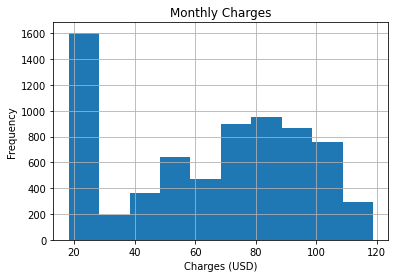

In [38]:
contract['MonthlyCharges'].hist()
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.title('Monthly Charges')

Los valores entre \\$20 y \\$30 parecen ser los más comunes De todas formas se explorarán los valores anómalos.  

Text(0.5, 1.0, 'Monthly Charges')

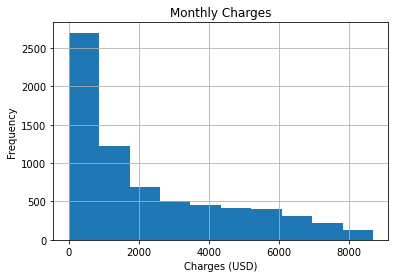

In [39]:
contract['TotalCharges'].hist()
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.title('Monthly Charges')

Los costos anuales tienen una distribución acorde a lo esperado. La cantidad de clientes disminuye a medida que los costos aumentan. 

#### Pregunta 2: ¿Existen valores anómalos en los datos de ganancias?

Mediante el uso de diagramas de cajas, procederemos a investigar si existen valores extremos en los datos de ingresos.

Text(0, 0.5, 'Charges (USD)')

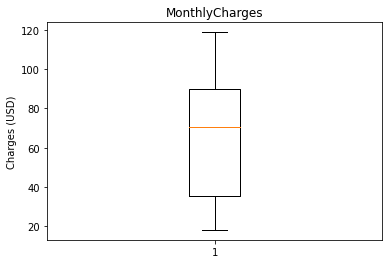

In [40]:
plt.figure()  
plt.boxplot(contract['MonthlyCharges'])
plt.title('MonthlyCharges')
plt.ylabel('Charges (USD)')

Al parecer, no existen valores extremos en "MonthlyCharges".

Text(0, 0.5, 'Charges (USD)')

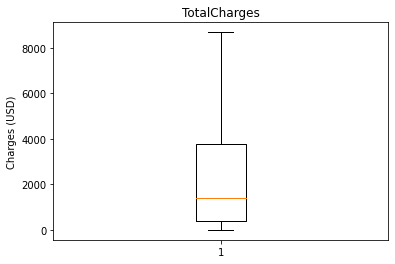

In [41]:
plt.figure()  
plt.boxplot(contract['TotalCharges'])
plt.title('TotalCharges')
plt.ylabel('Charges (USD)')

De igual forma, no existen valores extremos en "TotalCharges".

#### Pregunta 3:¿Cual es el tipo de contrato que genera más ingresos?

En esta pregunta, vamos a explorar las ingresos totales, mensuales y a lo largo de la duración de los contratos, de cada tipo de contrato.

**Función para el análisis**

In [42]:
def plot_total_comparison(df, value_variable):
    """
    Plots a bar chart comparing the total values of different categories.

    Parameters:
    - df: The DataFrame containing categories and corresponding values.
    - value_variable: The variable name for comparison.

    Returns:
    - None (displays the plot)
    """
    # Calculate the total values for each category
    totals = df.groupby('Type')[value_variable].sum().reset_index()

    # Sort the DataFrame by the total values in descending order
    totals = totals.sort_values(value_variable, ascending=False)

    # Plot the bar chart
    sns.barplot(x=value_variable, y='Type', data=totals)
    plt.xlabel('Total ' + value_variable.capitalize())
    plt.ylabel('Category')
    plt.title('Comparison of Total ' + value_variable + ' by Category')

    # Display the chart
    plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy bien definida tu función! y que incluyeras el docstring es algo que la lleva a un nivel  mucho más profesional
</div>

**Total de ingresos mensuales por tipo de contrato**

Empezaremos por el análisis mensual.

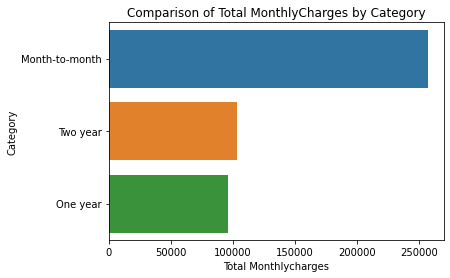

In [43]:
plot_total_comparison(contract, 'MonthlyCharges')

Para el caso de los cargos mensuales vemos que el contrato mes a mes es el mas beneficioso para la empresa, seguidos de los contratos a dos y un año (respectivamente) con valores similares. 

**Total de ingresos por tipo de contrato**

Ahora vamos a examinar los valores totales de ingreso a lo largo de la duración de los contratos.

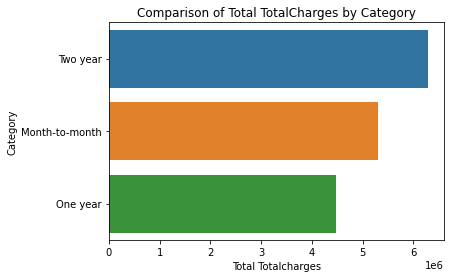

In [44]:
plot_total_comparison(contract, 'TotalCharges')

Desde esta perspectiva, vemos como el contrato a largo plazo (dos años) es el más beneficio para la empresa, seguido por el contrato mes a mes y el contrato a un año.  

Es interesante notar que en los dos análisis, el contrato a un año es el menos beneficioso para el negocio.  

#### Pregunta 4: ¿Cómo han variado los ingresos en el tiempo?

En esta pregunta vamos explorar la variación anual de los ingresos usando series de tiempo. 

**Función para el análisis**

In [45]:
def plot_yearly_time_series(df, date_column, value_column):
    """
    Plots a time series with a yearly time step and yearly aggregation of values.

    Parameters:
    - df: The DataFrame containing the date and value columns.
    - date_column: The column name for the date values.
    - value_column: The column name for the value to be plotted.

    Returns:
    - None (displays the plot)
    """
    # Convert the date column to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df[date_column] = pd.to_datetime(df[date_column])

    # Set the date column as the index
    df.set_index(date_column, inplace=True)

    # Resample the data to yearly frequency and aggregate values by sum
    yearly_data = df[value_column].resample('Y').sum()

    # Plot the time series
    sns.lineplot(data=yearly_data)
    plt.xlabel('Year')
    plt.ylabel(value_column)
    plt.title('Yearly Time Series of ' + value_column)

    # Reset the DataFrame to its original state
    df.reset_index(inplace=True)

    # Display the plot
    plt.show()

**Variación anual de los ingresos totales**

Siguiendo con este análisis, investigaremos la variación anual del total de los ingresos. 

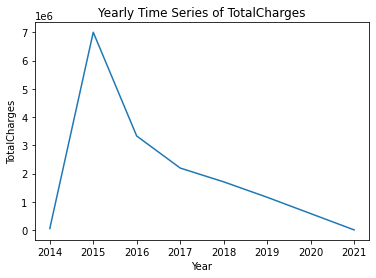

In [46]:
plot_yearly_time_series(contract, 'BeginDate', 'TotalCharges')

En este gráfico, vemos que en el año 2015 es de ingresos pico. En este caso, en este año se alcanza el valor máximo logrando aproximadamente 7 millones de dólares de ingreso. No obstante, después de ese año los ingresos caen en picada hasta alcanzar su punto más bajo en el año 2021.

#### Pregunta 5: ¿Cuál es el consumo de los diferentes servicios en porcentaje?

En esta pregunta, analizaremos por cada tipo de servicio de internet el porcentaje de usurios que lo usan. 

**Función para el análisis**

In [47]:
def plot_category_comparison(df, id_var):
    """
    Plot a comparison of categorical values in percentages using a FacetGrid.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        id_var (str): The column name to use as the id variable in the melted DataFrame.
    """
    # Melt the DataFrame to create a long-form representation
    df_melted = pd.melt(df, id_vars=id_var)

    # Calculate the percentage of each category
    category_percentages = (
        df_melted.groupby(['variable', 'value']).size() / len(df) * 100
    ).reset_index(name='Percentage')

    # Create a FacetGrid with seven panels
    g = sns.FacetGrid(category_percentages, col='variable', col_wrap=4, sharey=False)

    # Plot the bar charts in each panel
    g.map(sns.barplot, 'value', 'Percentage')

    # Set axis labels and titles for each panel
    for ax in g.axes.flat:
        ax.set_xlabel('Category')
        ax.set_ylabel('Percentage')

    # Set the overall title
    g.fig.suptitle('Categorical Comparison in Percentages', y=1.05)

    # Adjust spacing between subplots
    g.fig.tight_layout()

    # Display the plot
    plt.show()


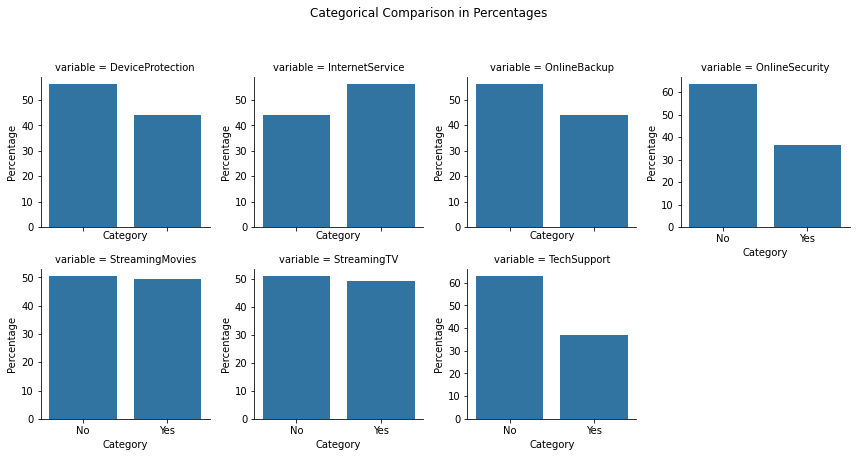

In [48]:
plot_category_comparison(internet, "CustomerID")

En esta gráfica, es interesante apreciar que los servicios "DeviceProtection", "Online BackUp", "Online Security", y "Tech Support" no los usa la mayor parte de usuarios. 

### Preguntas para entender la dinámica de las cancelaciones de contrato

#### Pregunta 6: ¿Qué porcentaje de los clientes han abandonado el servicio?

Para responder esta pregunta, estableceremos con exactitud el rango de tiempo en el que la empresa firmó su primer contrato y ejecutó su última cancelación. Posteriormente, determinaremos el porcentaje de cancelaciones en este período de tiempo.

In [49]:
contract["BeginDate"].min()

Timestamp('2013-10-01 00:00:00')

In [50]:
contract["EndDate"].max()

Timestamp('2020-01-01 00:00:00')

In [51]:
cancelations_percentages = round((sum(contract["EndDate"].value_counts())/len(contract))*100)
print(f"{cancelations_percentages}%")

27%


En el período comprendido entre 2013-10-01 y 2020-01-01, se han suscitado 27% de cancelaciones.

#### Pregunta 7: ¿Cuál es la tasa de cancelación de clientes actual y cómo ha evolucionado a lo largo del tiempo?

Para responder a esta pregunta, calcularemos el porcentaje de cancelaciones anual e intentaremos graficar una serie de tiempo.

In [52]:
#Anual count of canceled contracts
date_series = contract["EndDate"]
year_series = date_series.dt.year
year_series.value_counts()

2019.0    1409
2020.0     460
Name: EndDate, dtype: int64

Los contratos empezaron a cancelarse apenas en los últimos años de operación. Por lo tanto, no tiene sentido graficar una serie de tiempo.

Vamos a realizar la comparación con la cantidad total de contratos firmados. 

In [53]:
number_of_contracts = len(contract["EndDate"])
current_cancelations = round((460/number_of_contracts)*100) 
past_cancelations = round((1409/number_of_contracts)*100)
print(f"Pocentaje de cancelaciones actuales (año 2020): {current_cancelations}%")
print(f"Pocentaje de cancelaciones pasadas (año 2019): {past_cancelations}%")

Pocentaje de cancelaciones actuales (año 2020): 7%
Pocentaje de cancelaciones pasadas (año 2019): 20%


Los resultados reflejan que la tasas de cancelaciones se redujeron de 20% en 2019 a 7% en 2020. Sin embargo, en un gráfica anterior observamos que los ingresos totales decaían desde el 2015. Esto podría significar que la reducción de ingresos no esta asosciada a las cancelaciones de contratos, sino más bien a un menor consumo de los clientes.

#### Pregunta 8: ¿Existe alguna correlación entre la duración del contrato y la probabilidad de cancelación?

Para responder a esta pregunta, calcularemos la duración de los contratos de cada cliente. De acuerdo al líder del proyecto la fecha actual del proyecto es la última de "BeginDate" + 1 mes. En ese sentido, debemos en primer lugar determinal cual es esta fecha.

In [54]:
# Creates a new column with "current dates and end of contract days
current_project_date = contract["BeginDate"].max() + relativedelta(months=1)
replace_nan_with_current_project_date = lambda x: current_project_date  if pd.isna(x) else x
contract['NewDates'] = contract['EndDate'].apply(replace_nan_with_current_project_date) 

# Calculates contract duration for each client
contract['ContractDuration'] = (contract["NewDates"] - contract["BeginDate"])/365

# Convert the datetime column to integer representation
contract['ContractDuration'] = contract['ContractDuration'].astype('int64')

A continuación procederemos a calcular la correlación entre duración de contratos y cancelaciones.

In [55]:
# Create the lambda function
convert_to_1_or_0 = lambda x: 1 if isinstance(x, pd.Timestamp) else 0

# Apply the lambda function to the column and create a new column with the result
contract['EncodedCancelation'] = contract['EndDate'].apply(convert_to_1_or_0) 

# Calculate the correlation between the two columns
correlation = contract['ContractDuration'].corr(contract['EncodedCancelation'])

# Print the correlation value
print(f"Correlation: {correlation:.2f}")

Correlation: -0.37


In [56]:
contract['EncodedCancelation'].value_counts()

0    5174
1    1869
Name: EncodedCancelation, dtype: int64

El resultado de la correlación de -0.37 refleja que no existe una correlación fuerte entre la duración de los contratos y las cancelaciones.

#### Pregunta 9: ¿Cuál es la distribución de los montos mensuales de factura de los clientes que cancelan en comparación con los que se mantienen?

En este caso se crearán dos "datafames" con los datos de los clientes que han cancelado y otro con los que continúan con el servicio. Con esta segregación de datos se graficarán los histogramas de distribución de ingresos mensuales.

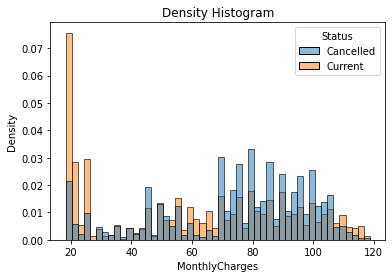

In [57]:
# Plots density distribution of monthly charges between vurrent and cancelled clients
canceled_clients = contract[contract['EndDate'].notnull()]
current_clients = contract[contract['EndDate'].isna()]
current_clients['Status'] = 'Current'
canceled_clients['Status'] = 'Cancelled'
contract_status = pd.concat([canceled_clients, current_clients], ignore_index=True, axis=0)
sns.histplot(data=contract_status, x='MonthlyCharges', hue='Status', bins=50, stat='density', common_norm=False);
plt.title("Density Histogram");

Los resultados nos demuestran que los clientes que cancelan tienden a ser los que mantienen costos mensuales de facturación más altos (entre \\$70 y \\$100). Por el contrario, los clientes que tienen facturaciones mensuales más bajas (por ejemplo \\$20-\\$30), suelen mantener sus contratos.

#### Pregunta 10: ¿Existe alguna época del año, o año en particular, en la que la terminación de contratos sea mas frecuente?

En un análisis anterior, se determinó que la mayor parte de las cancelaciones de contratos se suscitaron en el año 2019 (20%), y que la tasa de cancelaciones cayó al 7% en el año 2020. Usando los datos de estos dos años, se establecerá la distribución de cancelaciones de acuerdo a los meses del año.   

Text(0.5, 1.0, 'Monthly Distribution of Contract Cancellations')

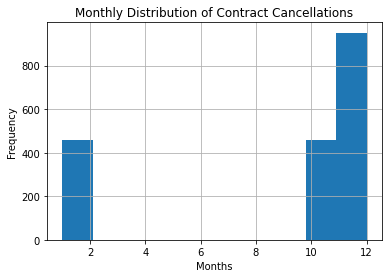

In [58]:
# Extract the month from the "date_column" and create a new column "month_column"
canceled_clients['EndMonth'] = canceled_clients['EndDate'].dt.month

#Plots a histogram of the distribution of cancelation months
canceled_clients['EndMonth'].hist()
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Monthly Distribution of Contract Cancellations')

Los resultados evidencian que el período de octubre a febrero es en el que se suscitan las  cancelaciones de contratos, con un pico de cancelaciones en el mes de diciembre. 

#### Pregunta 11: ¿Hay alguna relación entre el método de pago y la tasa de cancelación?

Para responder a esta pregunta plotearemos gráficos de barras para comparar la cantidad de cancelaciones por tipo de método de pago en porcentaje. 

**Función para el análisis**

In [59]:
def plot_category_comparison(data, category):
    """
    Plot a bar plot comparing the normalized percentages of a categorical value in a Series,
    and display a table with the percentages.

    Args:
        data (pandas.Series): The Series containing the data.
        category (str): The category name for the x-axis label.
    """
    # Calculate the normalized percentages of each category
    normalized_data = data.value_counts(normalize=True) * 100

    # Create a bar plot using Seaborn
    sns.barplot(x=normalized_data.index, y=normalized_data.values)

    # Set labels and title
    plt.xlabel(category)
    plt.ylabel('Percentage')
    plt.title(f'Comparison of {category} Categories in Percentages')

    # Show the plot
    plt.show()

    # Display a table with the percentages
    percentage_table = pd.DataFrame({'Category': normalized_data.index, 'Percentage': normalized_data.values.astype(int)})
    print(percentage_table)

In [60]:
# Extract values based on conditions for plotting
MailedCheck = contract_status.loc[contract_status['PaymentMethod'] == "Mailed check", 'Status']
ElectronicCheck = contract_status.loc[contract_status['PaymentMethod'] == "Electronic check", 'Status']
BankTransfer = contract_status.loc[contract_status['PaymentMethod'] == "Bank transfer (automatic)", 'Status']
CreditCard = contract_status.loc[contract_status['PaymentMethod'] == "Credit card (automatic)", 'Status']

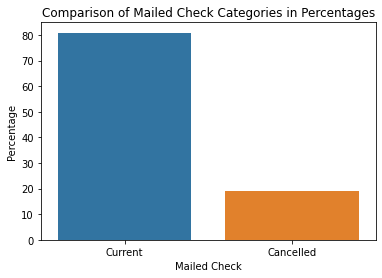

    Category  Percentage
0    Current          80
1  Cancelled          19


In [61]:
plot_category_comparison(MailedCheck, "Mailed Check")

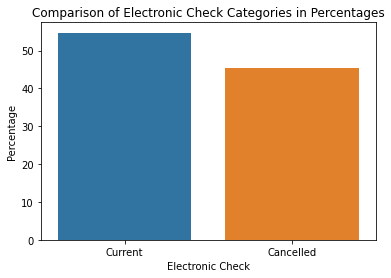

    Category  Percentage
0    Current          54
1  Cancelled          45


In [62]:
plot_category_comparison(ElectronicCheck, "Electronic Check")

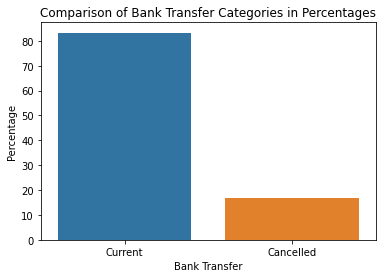

    Category  Percentage
0    Current          83
1  Cancelled          16


In [63]:
plot_category_comparison(BankTransfer, "Bank Transfer")

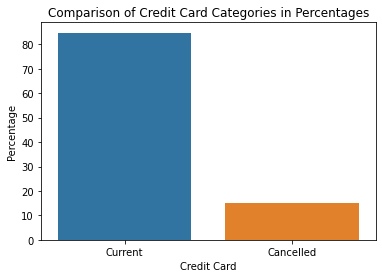

    Category  Percentage
0    Current          84
1  Cancelled          15


In [64]:
plot_category_comparison(CreditCard, "Credit Card")

Los gráficos nos permiten apreciar que la mayor parte de los contratos cancelados están asociados al método de pago de cheque electrónico ("Electronic Check"). El porcentaje de cancelaciones de esta clase es de 45 %. Este podría ser un dato clave para la modelación de la predicción de cancelaciones.  

#### Pregunta 12: ¿Existen diferencias significativas en la tasa de cancelación entre los clientes que utilizan ciertos servicios específicos y los que no?

Como primer paso, exploraremos las diferencias en los porcentajes de cancelación de cada tipo de servicio telefónico (una sola línea y múltiples líneas). Utilizaremos la función "plot_category_comparison" para el análisis.

In [65]:
# Perform the join operation
contract_status_phone = pd.merge(contract_status, phone, on='CustomerID', how='inner')

# Extract values based on conditions for plotting
SingleLine = contract_status_phone.loc[contract_status_phone['MultipleLines'] == "No", 'Status']
MultipleLine = contract_status_phone.loc[contract_status_phone['MultipleLines'] == "Yes", 'Status']

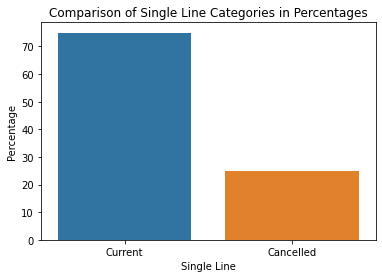

    Category  Percentage
0    Current          74
1  Cancelled          25


In [66]:
plot_category_comparison(SingleLine, "Single Line")

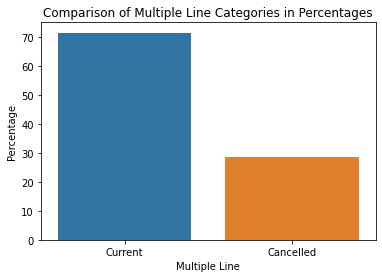

    Category  Percentage
0    Current          71
1  Cancelled          28


In [67]:
plot_category_comparison(MultipleLine, "Multiple Line")

Los gráficos nos permiten apreciar que la diferencia entre los porcentajes de cancelación de clientes que usan una y múltiples líneas es del 3 %. Para investigar más a fondo y determinar si la diferenica observada es estadísticamente significativa, realizaremos una prueba de hipótesis.

Dada la naturaleza categórica de los datos (clientes de teléfono de línea única y clientes de línea telefónica múltiple), realizaremos una prueba de independencia de chi-cuadrado para evaluar si existe una asociación significativa entre el tipo de cliente y el estado de cancelación.

**Hipótesis nula y alternativa:**

Hipótesis Nula (H0): No hay diferencia en las tasas de cancelación entre clientes de línea única y línea telefónica múltiple.

Hipótesis alternativa (H1): Hay una diferencia en las tasas de cancelación entre los clientes de una sola línea y de múltiples líneas telefónicas.

**Nivel de significancia:** 0.05

In [68]:
# Resets indices of series
SingleLine = SingleLine.reset_index(drop=True)
MultipleLine = MultipleLine.reset_index(drop=True)

# Create a contingency table of the observed frequencies
contingency_table = pd.crosstab(SingleLine, MultipleLine)

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the test result
print("Chi-square test result:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square test result:
Chi-square statistic: 2961.2145361331313
P-value: 0.0


Al ser el valor de P menor al nivel de significancia preestablecido, se rechaza la hipótesis nula y se concluye que si existe una diferencia estadísticamente significativa en las tasas de cancelación entre los clientes de una sola línea y de múltiples líneas telefónicas. 

#### Pregunta 13: ¿Qué variables tienen la mayor correlación (lineal) con la terminación de contratos?

Para este análisis preliminar, vamos a unir las tablas de contratos e información personal, puesto que las mismas contendrían la información más relevante para este análisis. Por el momento, no vamos a analizar la variable de método de pago ("PaymentMethod") por cuanto la misma no es de carácter binario.   

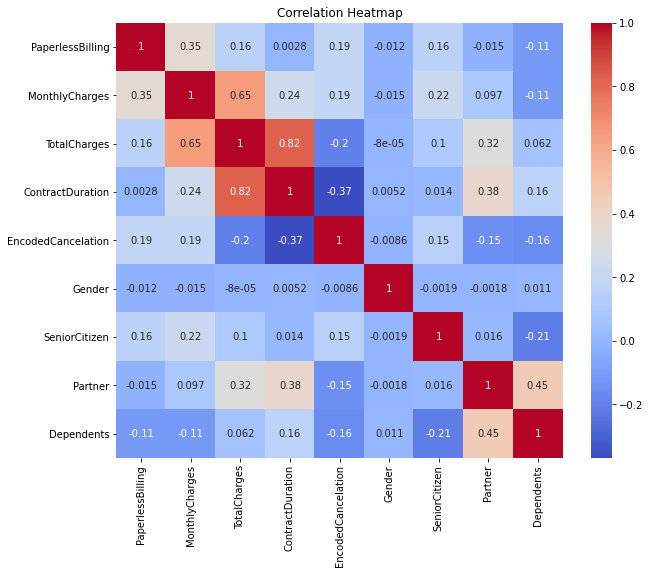

In [69]:
# Perform the join operation
merged_df = pd.merge(contract, personal, on='CustomerID', how='inner')

# Drop multiple columns
columns_to_drop = ["BeginDate", "CustomerID", "EndDate", "Type", 
                   "NewDates", "PaymentMethod"]
merged_df = merged_df.drop(columns=columns_to_drop)

# Define the mapping dictionary
encoding_map = {'Yes': 1, 'Male': 1, 'No': 0, 'Female':0}

# Encode the values using the replace() function
merged_df_encoded = merged_df.replace(encoding_map)

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the values in the DataFrame
normalized_values = scaler.fit_transform(merged_df_encoded.values)

# Create a new DataFrame with the normalized values
df_normalized = pd.DataFrame(normalized_values, columns=merged_df.columns)

# Calculate the correlation matrix
corr_matrix = df_normalized.corr()

# Create a correlation heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Este análisis confirma, por el momento, que la variable que más se relaciona con la terminación de los contratos es la duración de los mismos. Es interesante observar que los datos de información personal, incluyendo si el cliente es adulto mayor ("SeniorCitizen") presentan menos relevancia.
Cabe mencionar que los datos fueron codificados y normalizados para realizar el análisis.

#### Pregunta 14: ¿Hay alguna relación entre el total pagado por los clientes durante su contrato y la tasa de cancelación?

Para responder a esta pregunta, vamos a agrupar los datos entre las categorías de: 

* Contrato cancelado: 1
* Contrato activo: 0

Una vez agrupados los datos, procederemos a promediar los valores pagados por cada categoría.

In [70]:
contract.groupby('EncodedCancelation')['TotalCharges'].mean()

EncodedCancelation
0    2549.911442
1    1531.796094
Name: TotalCharges, dtype: float64

Las personas que mantienen sus contratos pagan más en promedio que las cancelan (\\$2557.71 versus \\$1531 respectivamente). 

#### Pregunta 15: ¿Quiénes cancelan más el servicio (hombres o mujeres, jubilados o clients más jóvenes, solteros o casados, con o sin hijos, etc.)?

Utilizaremos la función "plot_category_comparison" para responder a esta pregunta.

In [71]:
# Perform the join operation
contract_status_personal = pd.merge(contract_status, personal, on='CustomerID', how='inner')
contract_status_personal.head()

,BeginDate,CustomerID,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,NewDates,ContractDuration,EncodedCancelation,Status,Gender,SeniorCitizen,Partner,Dependents
0,2019-10-01,3668-QPYBK,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01,14439452054794,1,Cancelled,Male,0,No,No
1,2019-09-01,9237-HQITU,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01,14439452054794,1,Cancelled,Female,0,No,No
2,2019-03-01,9305-CDSKC,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50,2019-11-01,57994520547945,1,Cancelled,Female,0,No,No
3,2017-07-01,7892-POOKP,2019-11-01,Month-to-month,Yes,Electronic check,104.80,3046.05,2019-11-01,201915616438356,1,Cancelled,Female,0,Yes,No
4,2015-09-01,0280-XJGEX,2019-10-01,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,2019-10-01,352938082191780,1,Cancelled,Male,0,No,No


In [72]:
# Extract values based on conditions for plotting
Male = contract_status_personal.loc[contract_status_personal['Gender'] == "Male", 'Status']
Female = contract_status_personal.loc[contract_status_personal['Gender'] == "Female", 'Status']
SeniorCitizen = contract_status_personal.loc[contract_status_personal['SeniorCitizen'] == 1, 'Status']
NonSeniorCitizen = contract_status_personal.loc[contract_status_personal['SeniorCitizen'] == 0, 'Status']
WithPartner = contract_status_personal.loc[contract_status_personal['Partner'] == "Yes", 'Status']
NoPartner = contract_status_personal.loc[contract_status_personal['Partner'] == "No", 'Status']
WithDependents = contract_status_personal.loc[contract_status_personal['Dependents'] == "Yes", 'Status']
NoDependents = contract_status_personal.loc[contract_status_personal['Dependents'] == "No", 'Status']

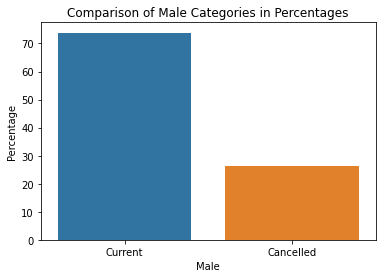

    Category  Percentage
0    Current          73
1  Cancelled          26


In [73]:
plot_category_comparison(Male, 'Male')

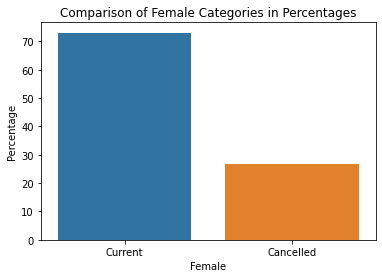

    Category  Percentage
0    Current          73
1  Cancelled          26


In [74]:
plot_category_comparison(Female, 'Female')

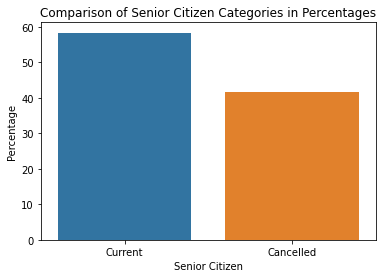

    Category  Percentage
0    Current          58
1  Cancelled          41


In [75]:
plot_category_comparison(SeniorCitizen, 'Senior Citizen')

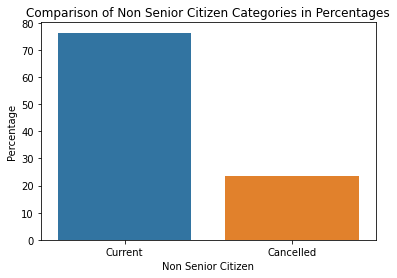

    Category  Percentage
0    Current          76
1  Cancelled          23


In [76]:
plot_category_comparison(NonSeniorCitizen, 'Non Senior Citizen')

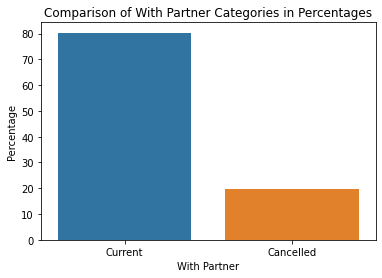

    Category  Percentage
0    Current          80
1  Cancelled          19


In [77]:
plot_category_comparison(WithPartner, 'With Partner')

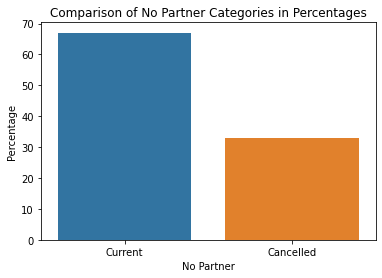

    Category  Percentage
0    Current          67
1  Cancelled          32


In [78]:
plot_category_comparison(NoPartner, 'No Partner')

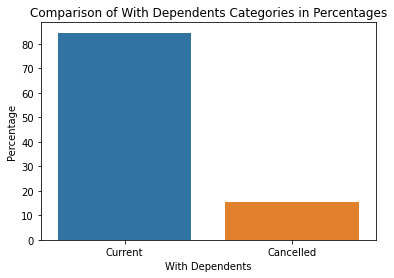

    Category  Percentage
0    Current          84
1  Cancelled          15


In [79]:
plot_category_comparison(WithDependents, 'With Dependents')

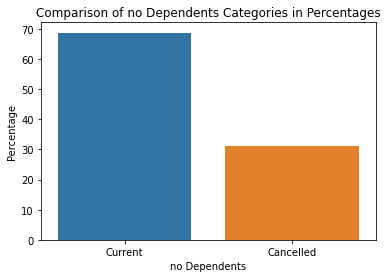

    Category  Percentage
0    Current          68
1  Cancelled          31


In [80]:
plot_category_comparison(NoDependents, 'no Dependents')

El resumen de resultados se presenta en la siguiente tabla:

|                        | **Current** | **Cancelled** |
|------------------------|-------------|---------------|
| **Male**               |      73     |       26      |
| **Female**             |      73     |       26      |
| **Senior Citizen**     |      58     |       41      |
| **Non Senior Citizen** |      76     |       23      |
| **With Partner**       |      80     |       19      |
| **No Partner**         |      67     |       32      |
| **With Dependents**    |      84     |       15      |
| **No Dependents**      |      68     |       31      |

Los resultados reflejan que el género es la única variable que no incide en la cancelación de contratos. Por otra parte, los adultos mayores, las personas sin pareja, y aquellas que no tienen hijos cancelan más sus contatos.

## A.4 Conclusiones Intermedias del Análisis Exploratorio de Datos <a name="conclusions_eda"></a>



Las conclusiones más importantes del análisis exploratorio de datos fueron:

1. No existen valores anómalos con respecto a los datos de ingresos.
2. La tasa de cancelaciones decreció del 20% en 2019 al 7% en 2020.  
3. Los clientes que cancelan tienden a ser los que mantienen costos mensuales de facturación más altos (entre \\$70 y \\$100). Por el contrario, los clientes que tienen facturaciones mensuales más bajas (por ejemplo \\$20-\\$30), suelen mantener sus contratos.
4. El 45% de las cancelaciones están asociadas al método de pago de cheque electrónico ("Electronic Check"). La comparación se realizó con datos de la misma clase, y es notablemente mayor al analizar las comparaciones del resto de clases.
5. Los resultados evidencian que el período de octubre a febrero es en el que se suscitan las cancelaciones de contratos, con un pico de cancelaciones en el mes de diciembre.
6. El análisis de correlación (de variables binarias) determina que la variable que más se relaciona con la terminación de los contratos es la duración de los mismos (coeficiente de correlación de -0.37). Es decir, mientras más duran los contratos, existen menos cancelaciones.
7. Existe una diferencia del 3% (estadísticamente significativa) en las tasas de cancelación entre los clientes de una sola línea y de múltiples líneas telefónicas.
8. Las personas que cancelan pagan en total más (en promedio) que las que mantienen su contrato (\\$2557.71 versus \\$1531 respectivamente).
9. El género es la única variable que no incide en la cancelación de contratos. Por otra parte, los adultos mayores, las personas sin pareja, y aquellas que no tienen hijos cancelan más sus contatos. 


## Preguntas para el líder del proyecto <a name="questions_leader"></a>

1. En la columna "EndDate" existen valores catalogados como "No". En este contexto, esta catalogación significa: 1) que no se cuenta con el dato, o 2) que el contrato sigue vigente.
2. Las "Condiciones de la asignación principal" declaran que: "La información del contrato es válida a partir del 1 de febrero de 2020." Lo cual implicaría que contratos previos a esta fecha no tendrían información válida. No obstante, la base de datos cuenta con un 97% de contratos con fecha previa a 1 de febrero de 2020. ¿Es esta condición correcta? ¿Estoy interpretando correctamente la condición de la asignación? 
3. Existen contratos que no se han cancelado. Existen datos hasta el 2021. ¿Que fecha utilizamos como actual en este proyecto? ¿Alguna en 2021 o la actual?.

## A.5 Plan de Trabajo<a name="work_plan"></a>

Para el presente proyecto de modelación, el plan de trabajo es el siguiente:

**1. Comprensión del problema y objetivos:**

* Familiarización con el contexto y los requisitos comerciales de la empresa de telecomunicaciones.
* Comprensión del problema de cancelación de clientes y los objetivos de predicción.
* Definición de los objetivos del proyecto, como la precisión requerida del modelo y las métricas de evaluación.

**2. Recopilación de datos:**

* Obtención de los conjuntos de datos relevantes, que pueden incluir como información demográfica, comportamiento del cliente, servicios contratados, registros de uso, etc.

**3. Pre-procesamiento de datos**

* Limpieza y pre-procesamiento de los datos para tratar los valores faltantes, datos duplicados o inconsistentes.

**4. Análisis Exploratorio de Datos**

* Exploración y análisis de los datos para comprender su estructura, calidad y características. Se realizará un análisis exploratorio de datos para identificar patrones, relaciones y posibles variables predictivas.

**5. Preparación de datos para el modelamiento:**

* Realización de la ingeniería de características, creando nuevas variables que puedan ser útiles para la predicción de cancelación, como la duración de la relación con el cliente, la frecuencia de uso de ciertos servicios, etc.

* Codificación de las variables categóricas en representaciones numéricas adecuadas para el modelo.


**6. División de datos:**

* División de los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utilizará para entrenar el modelo, mientras que el conjunto de prueba se utilizará para evaluar su rendimiento.

**7. Selección y entrenamiento de modelos:**

* Selección y aplicación de modelos de aprendizaje automático adecuados para la predicción de cancelación, como regresión logística, árboles de decisión, bosques aleatorios, gradient boosting, redes neuronales, etc.

* Ajuste de los hiperparámetros de los modelos utilizando técnicas de validación cruzada y búsqueda en rejilla para mejorar su rendimiento.

**8. Evaluación de modelos:**

* Evaluación de los modelos utilizando métricas apropiadas para la predicción de cancelación, como precisión, recall, exactitud y área bajo la curva ROC.

* Comparación del rendimiento de los diferentes modelos y selección del mejor modelo basado en las métricas de evaluación y los objetivos del proyecto.

**9. Validación del modelo:**

* Validación del modelo final seleccionado utilizando datos no vistos, es decir, el conjunto de prueba. Evaluación de su rendimiento y generalización en nuevos datos.

# B) CÓDIGO DE SOLUCIÓN  <a name="solution_code"></a>

## B.1 Preparación de datos para el modelamiento <a name="feature_engineering"></a>

Para preparar los datos para el modelamiento, tomaremos en cuenta la mayor parte de las variables que se usaron para el análisis de correlación. No obstante, en base a los resultados del EDA, en nuestra ingeniería de características realizaremos las siguientes modificaciones:

1. Eliminaremos las columnas "PaperlessBilling" y "Gender" que no tienen relación con la cancelación de los contratos. 
2. En método de pago se codificará a "Electronic Check" como 1 y el resto de variables como 0, en virtud del alto porcentaje de cancelaciones con cheque electrónico (determinado en el EDA).

Adicionalmente, el EDA nos demostró que existe un desbalance de clases en la variable objetivo (las cancelaciones, "EncodedCancelation"). Para resolver este problema, inicialmente se aplicará un ajuste de clases durante el entrenamiento de los modelos. En caso de que este medida no de buenos resultados se evaluarán otras alternativas (ej: realizar un sobremuestreo sobre la clase minoritaria) 

In [81]:
# Perform the join operation
data_modelling = pd.merge(contract, personal, on='CustomerID', how='inner')


# Drop multiple columns
columns_to_drop = ["BeginDate", "CustomerID", "EndDate", "Type", 
                   "NewDates", "PaperlessBilling", "Gender"]

data_modelling = data_modelling.drop(columns=columns_to_drop)

# Define the mapping dictionary 
encoding_map = {'Yes': 1, 'Male': 1, 'Male': 1, 'Electronic check':1, 
                'No': 0, 'Female':0, 'Mailed check': 0, 'Bank transfer (automatic)':0,
               'Credit card (automatic)':0, 
                10:1, 11:1, 12:1, 1:1, 2:1}

# Encode the values using the replace() function
data_modelling_encoded = data_modelling.replace(encoding_map)

data_modelling_encoded

,PaymentMethod,MonthlyCharges,TotalCharges,ContractDuration,EncodedCancelation,SeniorCitizen,Partner,Dependents
0,1,29.85,29.85,14202739726027,0,0,1,0
1,0,56.95,1889.50,252098630136986,0,0,0,0
2,0,53.85,108.15,14439452054794,1,0,0,0
3,0,42.30,1840.75,331397260273972,0,0,0,0
4,1,70.70,151.65,14439452054794,1,0,0,0
...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,179664657534246,0,0,1,1
7039,0,103.20,7362.90,525501369863013,0,0,1,1
7040,1,29.60,346.45,86636712328767,0,0,1,1
7041,0,74.40,306.60,29115616438356,1,1,1,0


Una vez más, analizaremos el desbalance de clase de la variable objetivo. Esta vez, realizaremos la comparación en porcentaje entre contratos vigentes y los cancelados.   

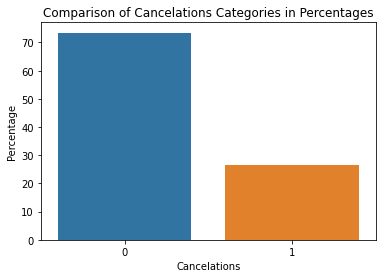

   Category  Percentage
0         0          73
1         1          26


In [82]:
# Unbalanced data analysos of tsrget variable
EncodedCancelation = data_modelling_encoded["EncodedCancelation"]
plot_category_comparison(EncodedCancelation, 'Cancelations')

En porcentaje, podemos ver que existe un fuerte desbalance de clase. El 26% de los contratos fueron cancelados y un 73 % están vigentes. Como se mencionó al inicio de la sección, se realizará un ajuste de clases en el entrenamiento de los modelos para corregir el desbalance.

## B.2 División de datos <a name="train_test_split"></a>

A continuación, procederemos a dividir los datos en conjuntos de entrenamiento, prueba y validación (80 %, 10 % y 10% respectivamente). 

In [83]:
# Selects features and data
X = data_modelling_encoded.drop('EncodedCancelation', axis=1)
y = data_modelling_encoded['EncodedCancelation']

# Split the data into training and test sets (80% for training, 20% for testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the remaining data into validation and test sets (50% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of each set
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 5634
Validation set size: 704
Test set size: 705


Los modelos "K_Vecinos Cercanos" y "Potenciación del Gradiente" no incluyen un parámetro para corregir el desbalance de clases directamente en la etapa de generación de la instancia de los mismos (class_weight='balanced'). En ese sentido, se aplicará un sobre muestreo para corregir el desbalance antes de correr estos dos últimos modelos. 

In [84]:
# Upsampling function

def upsample(X, y, repeat):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)

    X_upsampled, y_upsampled = shuffle(
        X_upsampled, y_upsampled, random_state=12345
    )

    return X_upsampled, y_upsampled

X_upsampled, y_upsampled = upsample(
    X_train, y_train, 10
)

# Print the sizes of each set

print("X_upsampled:", len(X_upsampled))
print("y_upsampled:", len(y_upsampled))

X_upsampled: 19098
y_upsampled: 19098


## B.3 Estandarización de datos <a name="standarization"></a>

En esta sección se procederá a la estandarización de datos. Se utilizará el método "StandardScaler". Este método divide los valores para la media y luego los divide para la desviación estándar. Este es un procedimiento muy usado para la estandarización de datos en investigación científica y también en la industria. El método mejora el rendimiento de varios algoritmos de aprendizaje automático (fuente: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02). 

In [85]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Create a new DataFrame with the normalized values
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)


In [86]:
# Print the scaled data
print("Scaled Data (train):")
X_train

Scaled Data (train):


,PaymentMethod,MonthlyCharges,TotalCharges,ContractDuration,SeniorCitizen,Partner,Dependents
0,-0.709650,-0.000474,-0.419925,-0.451049,-0.437749,-0.969579,1.532186
1,-0.709650,1.074754,1.256017,0.891324,-0.437749,-0.969579,-0.652662
2,1.409146,-1.376499,-1.000283,-1.306745,-0.437749,1.031376,-0.652662
3,1.409146,0.177346,-0.905497,-1.182402,-0.437749,-0.969579,-0.652662
4,-0.709650,-0.098524,-1.010646,-1.308082,-0.437749,-0.969579,1.532186
...,...,...,...,...,...,...,...
5629,1.409146,1.001632,-0.968666,-1.306745,-0.437749,1.031376,-0.652662
5630,-0.709650,0.872006,-0.039235,-0.369491,-0.437749,1.031376,1.532186
5631,1.409146,-1.452945,-0.875405,-0.820068,-0.437749,1.031376,1.532186
5632,1.409146,1.149538,-0.480309,-0.858842,2.284413,-0.969579,-0.652662


In [87]:
# Print the scaled data
print("Scaled Data (test):")
X_test

Scaled Data (test):


,PaymentMethod,MonthlyCharges,TotalCharges,ContractDuration,SeniorCitizen,Partner,Dependents
0,-0.709650,-0.472444,-0.988264,-1.306745,-0.437749,-0.969579,-0.652662
1,-0.709650,0.297000,1.029149,1.174774,-0.437749,1.031376,1.532186
2,-0.709650,-1.331629,-0.381303,0.972883,-0.437749,-0.969579,1.532186
3,-0.709650,1.475264,2.012513,1.256332,-0.437749,1.031376,-0.652662
4,1.409146,-0.681839,-0.600946,-0.492497,-0.437749,-0.969579,-0.652662
...,...,...,...,...,...,...,...
700,-0.709650,1.476926,2.428533,1.583904,-0.437749,1.031376,1.532186
701,-0.709650,1.023236,1.969562,1.502345,-0.437749,1.031376,-0.652662
702,-0.709650,-1.502801,-0.791953,-0.249158,-0.437749,1.031376,1.532186
703,1.409146,0.451554,0.065427,-0.084704,-0.437749,-0.969579,-0.652662


In [88]:
# Print the scaled data
print("Scaled Data:")
X_val

Scaled Data:


,PaymentMethod,MonthlyCharges,TotalCharges,ContractDuration,SeniorCitizen,Partner,Dependents
0,-0.709650,0.529662,0.036329,-0.086041,-0.437749,1.031376,1.532186
1,-0.709650,-0.297948,-0.941026,-1.185076,-0.437749,-0.969579,1.532186
2,-0.709650,-1.311686,-0.294692,1.460897,-0.437749,1.031376,1.532186
3,-0.709650,-0.678515,-0.043587,0.728207,-0.437749,1.031376,-0.652662
4,1.409146,-1.484520,-0.981503,-1.185076,-0.437749,-0.969579,-0.652662
...,...,...,...,...,...,...,...
699,-0.709650,-1.514434,-0.928807,-0.898953,-0.437749,-0.969579,-0.652662
700,-0.709650,-1.501139,-0.745842,-0.086041,-0.437749,1.031376,1.532186
701,-0.709650,0.137461,-0.571052,-0.735836,-0.437749,-0.969579,1.532186
702,-0.709650,0.193965,0.099365,0.155960,-0.437749,-0.969579,-0.652662


## B.4 Selección modelos <a name="modelling"></a>

Para la modelación, seleccionaremos y entrenaremos seis modelos. Los modelos se detallan en la siguiente tabla en orden de dificultad de implementación (menor a mayor grado de dificultad). Ademas, se realiza un breve análisis de los pros y contras de cada uno. 

|          **Modelo**          |                    **Pros**                    |                      **Cons**                      |
|:----------------------------:|:----------------------------------------------:|:--------------------------------------------------:|
|    1. Regresión Logística    | - Fácil de implementar                         | - Puede ser sensible a datos desbalanceados        |
|    2. Árboles de Decisión    | - Interpretable                                | - Puede sobreajustar fácilmente                    |
| 3. K-Vecinos Cercanos (KNN) | - Fácil implementación y comprensión           | - No captura relaciones complejas entre variables  |
|       4. Bosque Aleatorio       | - Buen rendimiento en datos no lineales        | - Requiere ajuste de hiperparámetros               |
|  5. Support Vector Machines  | - Efectivo en espacios de alta dimensionalidad | - Requiere ajuste de hiperparámetros               |
|     6. Potenciación de Gradiente     | - Puede capturar relaciones no lineales        | - Mayor dificultad en el ajuste de hiperparámetros |

## B.5 Entrenamiento y Evaluación modelos <a name="evaluation"></a>

### Regresión logística

In [89]:
# Create instance
logreg = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')

# Trains 
logreg.fit(X_train, y_train)
    
# Get the predictions on the training and test sets
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)
    
# Calculate performance metrics on training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
    
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
    
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
    
train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
    
# Prints performance metrics
print(f"Model:Logístic Regression ")
print()

print(f"Train AUC-ROC: {train_roc_auc:.2f}")
print(f"Test AUC-ROC: {test_roc_auc:.2f}")

print()

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")


Model:Logístic Regression 

Train AUC-ROC: 0.75
Test AUC-ROC: 0.80

Train accuracy: 0.74
Test accuracy: 0.77


**En el modelo de regresión logística, no evidencia un sobre ajuste y supera el valor mínimo aceptable del requerimiento del proyecto (AUC-ROC > 0.75).**

### Árboles de Decisión

Se aprecia que el modelo de Árbol de Decisión no presenta sobre ajuste para la métrica princial (AUC_ROC). Pero no alcanza el valor mínimo aceptable del requerimiento del proyecto (AUC-ROC > 0.75).

In [90]:
# Define the list of depths to try
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

best_auc_roc = 0
best_accuracy = 0
best_depth = None

for depth in depths:
    # Define the Decision Tree classifier with class_weight='balanced' and current depth
    dt_clf = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, random_state=123)
    
    # Fit the model on the training data
    dt_clf.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_train_pred = dt_clf.predict(X_train)
    y_test_pred = dt_clf.predict(X_test)
    
    # Calculate AUC-ROC and Accuracy for current depth on train and test sets
    train_auc_roc = roc_auc_score(y_train, y_train_pred)
    test_auc_roc = roc_auc_score(y_test, y_test_pred)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Check if the current model has better AUC-ROC than the previous best
    if test_auc_roc > best_auc_roc:
        best_auc_roc = test_auc_roc
        best_accuracy = test_accuracy
        best_depth = depth

# Train the final model using the best depth
best_dt_clf = DecisionTreeClassifier(class_weight='balanced', max_depth=best_depth, random_state=123)
best_dt_clf.fit(X_train, y_train)

# Predict on train and test sets using the best model
y_train_pred = best_dt_clf.predict(X_train)
y_test_pred = best_dt_clf.predict(X_test)

# Calculate AUC-ROC and Accuracy for train and test sets using the best model
train_auc_roc = roc_auc_score(y_train, y_train_pred)
test_auc_roc = roc_auc_score(y_test, y_test_pred)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the best result and evaluation of AUC-ROC and Accuracy for train and test sets with only two decimal digits
print("Best depth: {:.2f}".format(best_depth))
print()
print("Best AUC-ROC: {:.2f}".format(best_auc_roc))
print("Best Accuracy: {:.2f}".format(best_accuracy))
print()
print("Train AUC-ROC: {:.2f}".format(train_auc_roc))
print("Test AUC-ROC: {:.2f}".format(test_auc_roc))
print()
print("Train Accuracy: {:.2f}".format(train_accuracy))
print("Test Accuracy: {:.2f}".format(test_accuracy))

Best depth: 10.00

Best AUC-ROC: 0.83
Best Accuracy: 0.82

Train AUC-ROC: 0.86
Test AUC-ROC: 0.83

Train Accuracy: 0.84
Test Accuracy: 0.82


Se aprecia que el modelo de Árbol de Decisión no presenta sobre ajuste y alcanza el valor mínimo aceptable del requerimiento del proyecto (AUC-ROC > 0.75).

### Bosque Aleatorio

In [91]:
# Initialize the lists to store the metrics
test_accuracy_list = []

# Bucle para evaluar el modelo con diferentes profundidades de árbol
for depth in range(1, 12):
    # Loop to evaluate the model with different tree depths
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, class_weight='balanced')
    rf_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_test_pred = rf_model.predict(X_test)
    
    # Calculate the accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store accuracy in list
    test_accuracy_list.append(test_accuracy)

# Find the index of the best depth (highest accuracy on the test set)
best_depth_index = test_accuracy_list.index(max(test_accuracy_list))
best_depth = best_depth_index + 1

# Create and train the model of the best model
best_model = RandomForestClassifier(n_estimators=100, max_depth=best_depth, random_state=42, class_weight='balanced')
best_model.fit(X_train, y_train)

# Make predictions on the training and test sets with the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calcular las métricas AUC-ROC y exactitud para el mejor modelo
train_auc_roc = roc_auc_score(y_train, y_train_pred)
test_auc_roc = roc_auc_score(y_test, y_test_pred)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate AUC-ROC metrics and accuracy for the best model
print(f"Best model: Tree depth = {best_depth}")
print()
print(f"Train AUC-ROC: {train_auc_roc:.2f}")
print(f"Test AUC-ROC: {test_auc_roc:.2f}")
print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

Best model: Tree depth = 11

Train AUC-ROC: 0.91
Test AUC-ROC: 0.82
Train accuracy: 0.92
Test accuracy: 0.85


**El modelo de Bosque Aleatorio presenta un sobreajuste de 9% y supera el valor mínimo aceptable del requerimiento del proyecto (AUC-ROC >0.75)**. 

###  Support Vector Machines

In [92]:
# Create SVM model with linear kernel
svm_model = SVC(kernel='linear', class_weight='balanced')

# Train the model with cross validation to avoid overfitting
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Obtain the mean of the cross-validation scores
mean_cv_score = cv_scores.mean()

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Get the predictions on the training and test sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_auc_roc = roc_auc_score(y_train, y_train_pred)
test_auc_roc = roc_auc_score(y_test, y_test_pred)

# Print performance metrics

print(f"Train AUC-ROC: {train_auc_roc:.2f}")
print(f"Test AUC-ROC: {test_auc_roc:.2f}")
print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")
print(f"Mean cross validation: {mean_cv_score:.2f}")


Train AUC-ROC: 0.75
Test AUC-ROC: 0.79
Train accuracy: 0.74
Test accuracy: 0.76
Mean cross validation: 0.74


**El modelo "Support Vector Machines" no presenta sobre ajuste y supera el valor mínimo aceptable del requerimiento del proyecto (AUC-ROC >0.75)**. 

Los modelos "K_Vecinos Cercanos" y "Potenciación del Gradiente" no incluyen un parámetro para corregir el desbalance de clases directamente en la etapa de generación de la instancia de los mismos (como si fue el caso para los anteriores algoritmos con la aplicación del parámetro class_weight='balanced'). En ese sentido, se aplicará un sobre muestreo para corregir el desbalance antes de correr estos dos últimos modelos. 

### K-Vecinos Cercanos (KNN)

In [93]:
# Create instance
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the model 
knn.fit(X_upsampled, y_upsampled)

# Get the predictions on the training and test sets
y_train_pred = knn.predict(X_upsampled)
y_test_pred = knn.predict(X_test)

# Calculate performance metrics on training and test sets
train_auc = roc_auc_score(y_upsampled, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

train_accuracy = accuracy_score(y_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Imprimir los resultados
print("Train AUC-ROC: {:.2f}".format(train_auc))
print("Test AUC-ROC: {:.2f}".format(test_auc))
print()
print("Train accuracy: {:.2f}".format(train_accuracy))
print("Test accuracy: {:.2f}".format(test_accuracy))

Train AUC-ROC: 0.99
Test AUC-ROC: 0.50

Train accuracy: 1.00
Test accuracy: 0.74


Se aprecia que el sobremuestreo que se aplicó para corregir el desbalance de clases sobreajusta el modelo.   

### Potenciación de Gradiente

In [94]:
# Define the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 75],     # Number of boosting stages to be run
    'learning_rate': [0.01, 0.05],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5]              # Maximum depth of the individual estimators
}

# Initialize GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_upsampled, y_upsampled)

# Get the best model from GridSearchCV
best_gb_clf = grid_search.best_estimator_

# Predict on training and test sets using the best model
y_train_pred = best_gb_clf.predict(X_upsampled)
y_test_pred = best_gb_clf.predict(X_test)

# Calculate accuracy and AUC-ROC for training and test sets
train_accuracy = accuracy_score(y_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_auc_roc = roc_auc_score(y_upsampled, y_train_pred)
test_auc_roc = roc_auc_score(y_test, y_test_pred)

# Print the results
print("Best model parameters:", grid_search.best_params_)
print("Train AUC-ROC: {:.2f}".format(train_auc_roc))
print("Test AUC-ROC: {:.2f}".format(test_auc_roc))
print("Train accuracy: {:.2f}".format(train_accuracy))
print("Test accuracy: {:.2f}".format(test_accuracy))

Best model parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 75}
Train AUC-ROC: 0.78
Test AUC-ROC: 0.50
Train accuracy: 0.89
Test accuracy: 0.74


El modelo de Potenciación de Gradiente presenta un sobre ajuste de la métrica AUC-ROC de +28% (con datos balanceados). Tampoco alcanza el valor mínimo aceptable del requerimiento del proyecto (AUC-ROC >0.75). 

## B.6 Conclusiones intermedias evaluación de modelos <a name="conclusions_evaluation"></a>


1. De los seis modelos explorados, cuatro cumplen inicialmente con la condición de la  tarea (AUC-ROC>0.75): Regresión Logística, Árbol de Decisión, Bosque Aleatorio y "Support Vector Machine". En la etapa final estos modelos serán validados para presentar el modelo ganador.

## B.7 Validación de modelos  <a name="validation"></a>

### Regresión Logística

In [95]:
# Make predictions on the validation set
y_pred = logreg.predict(X_val)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val, y_pred)

# Calculate accuracy score
y_val_pred = np.round(y_pred)
accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation ROC-AUC: {roc_auc:.2f}")
print(f"Validation Accuracy: {accuracy:.2f}")

Validation ROC-AUC: 0.77
Validation Accuracy: 0.75


### Árbol de Decisión

In [99]:
# Define a range of depths to test
depths = range(1, 11)

best_depth = None
best_auc_roc = 0.0
best_accuracy = 0.0

for depth in depths:
    # Create and fit the Decision Tree model
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Predict probabilities for the validation set
    y_proba = model.predict_proba(X_val)
    auc_roc = roc_auc_score(y_val, y_proba[:, 1])
    accuracy = accuracy_score(y_val, model.predict(X_val))

    # Update the best metrics and depth if necessary
    if auc_roc > best_auc_roc:
        best_depth = depth
        best_auc_roc = auc_roc
        best_accuracy = accuracy

# Print the results with 2 decimal digits for the best depth only
print(f"Best depth: {best_depth}, Best AUC-ROC: {best_auc_roc:.2f}, Best Accuracy: {best_accuracy:.2f}")


Best depth: 9, Best AUC-ROC: 0.88, Best Accuracy: 0.84


### Bosque Aleatorio

In [96]:
# Define the range of depths to test
depths = [3, 5, 7, 10, 15]

best_depth = None
best_roc_auc = 0.0
best_accuracy = 0.0

for depth in depths:
    # Create and train the Random Forest model with specified depth
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Predict probabilities on the validation set
    y_val_pred_prob = model.predict_proba(X_val)[:, 1]

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_val, y_val_pred_prob)

    # Predict classes on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate Accuracy
    accuracy = accuracy_score(y_val, y_val_pred)

    # Keep track of the best depth based on ROC-AUC
    if roc_auc > best_roc_auc:
        best_depth = depth
        best_roc_auc = roc_auc
        best_accuracy = accuracy

print(f"Best Depth: {best_depth}")
print(f"Best Validation ROC-AUC: {best_roc_auc:.2f}")
print(f"Best Validation Accuracy: {best_accuracy:.2f}")

Best Depth: 10
Best Validation ROC-AUC: 0.89
Best Validation Accuracy: 0.86


### Support Vector Machine

In [97]:
# Create and train the Support Vector Machine (SVM) model
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_pred_prob = model.predict_proba(X_val)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

# Predict classes on the validation set
y_val_pred = model.predict(X_val)

# Calculate Accuracy
accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation ROC-AUC: {roc_auc:.2f}")
print(f"Validation Accuracy: {accuracy:.2f}")

Validation ROC-AUC: 0.84
Validation Accuracy: 0.80


### Resumen de resultados de la validación de modelos

| **Ranking** |       **Modelo**       | **AUC-ROC** | **Accuracy** |
|:-----------:|:----------------------:|:-----------:|:------------:|
|      1      |    Bosque Aleatorio    |     0.89    |     0.86     |
|      2      |    Árbol de Decisión   |     0.88    |     0.84     |
|      3      | Support Vector Machine |     0.84    |     0.80     |
|      4      |   Logistic Regression  |     0.77    |     0.75     |

## B.8 Conclusiones intermedias validación de modelos <a name="conclusions_validation"></a>

1. La etapa de evaluación detectaron cuatro modelos que podían cumplir con los requisitos mínimos del proyecto (AUC_ROC>0.75): Regresión Logística, Árbol de Decision, Bosque Aleatorio y "Support Vector Machine". 

2. La validación de modelos determinó que, efectivamente, los cuatro modelos antes mencionados cumplen con los requisitos mínimos de la tarea. El ranking de los mismos en esta etapa fue el siguiente: 1) Bosque Aleatorio (AUC-ROC=0.89), Árbol de Decision (AUC-ROC=0.88), Support Vector Machine (AUC-ROC=0.84), y Logistic Regression (AUC-ROC=0.77).